In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
import os

In [ ]:
Edata=pd.read_csv(r'/Users/vivekbhadula/Downloads/Womens_Clothing_E_Commerce_Reviews.csv')

In [ ]:
Edata.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
Edata.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [ ]:
Edata = Edata.drop('Unnamed: 0',axis=1)

In [ ]:
Edata.columns=['Clothing_Id','Age','Title','Review_Text','Rating','Recommended_IND','Positive_Feedback_Count','Division_Name','Department_Name','Class_Name']

In [ ]:
Edata.head()

,Clothing_Id,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
Edata.dtypes

Clothing_Id                 int64
Age                         int64
Title                      object
Review_Text                object
Rating                      int64
Recommended_IND             int64
Positive_Feedback_Count     int64
Division_Name              object
Department_Name            object
Class_Name                 object
dtype: object

In [ ]:
Edata.describe()

,Clothing_Id,Age,Rating,Recommended_IND,Positive_Feedback_Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [ ]:
for i in Edata.columns[Edata.isna().any()].tolist():
    print(i,'has',Edata[Edata[i].isna()==True].shape[0],'Null Values')

Title has 3810 Null Values
Review_Text has 845 Null Values
Division_Name has 14 Null Values
Department_Name has 14 Null Values
Class_Name has 14 Null Values


In [ ]:
Edata['class']="bad"
Edata.loc[Edata.Rating>3,['class']]='good'

In [ ]:
def ret_rating(rating):
    if rating>3:
        return 'good'
    else:
        return 'bad'

In [ ]:
Edata.head()

,Clothing_Id,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,class
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,good
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,good
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,bad
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,good
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,good


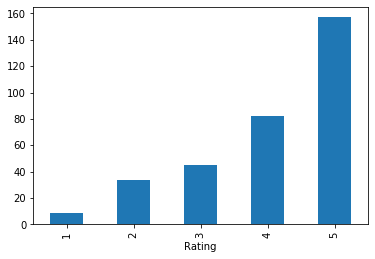

In [ ]:
Edata[(Edata.Clothing_Id==1095)].groupby(['Rating'])['Rating'].count().plot(kind='bar')

In [ ]:
Edata.corr()

,Clothing_Id,Age,Rating,Recommended_IND,Positive_Feedback_Count
Clothing_Id,1.000000,0.017972,-0.018879,-0.016206,0.046356
Age,0.017972,1.000000,0.026831,0.030622,0.043079
Rating,-0.018879,0.026831,1.000000,0.792336,-0.064961
Recommended_IND,-0.016206,0.030622,0.792336,1.000000,-0.069045
Positive_Feedback_Count,0.046356,0.043079,-0.064961,-0.069045,1.000000


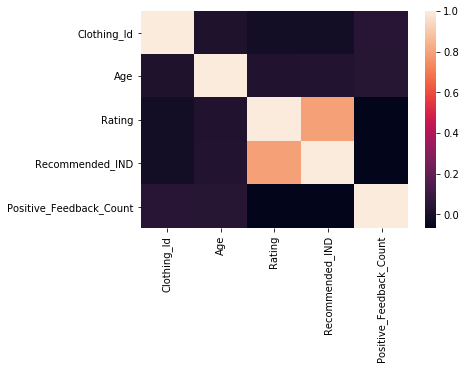

In [ ]:
sns.heatmap(Edata.corr())

In [ ]:
import warnings
warnings.filterwarnings('ignore')
Edata.dropna(inplace=True)
Edata.reset_index(drop=True, inplace=True)
import re
for i in range(len(Edata)):
    #print(i)
    Edata['Review_Text'][i] = Edata['Review_Text'][i].replace("'s", " is").replace("'ll", " will").replace("'ve", " have").replace("'m", " am").replace("\'", "'")
    
Edata['Review_Text'][1]

Edata.head()

,Clothing_Id,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,class
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,bad
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it is fun, f...",5,1,0,General Petite,Bottoms,Pants,good
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,good
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,bad
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,good


In [ ]:
import nltk
import en_core_web_sm
import spacy
nlp = spacy.load("en_core_web_sm")
from nltk.corpus import stopwords
def lemmatization(Edata):
    Edata["Lemmas"] = [" ".join([token.lemma_ if token.lemma_ != "-PRON-" 
    else token.text.lower() for sentence in nlp(speech).sents 
    for token in sentence if token.pos_ in {"NOUN", "VERB", "ADJ", "ADV", "X"} 
    and token.is_stop == False]) for speech in Edata.text]

    
Edata["Lemmas"] = [" ".join([token.lemma_ if token.lemma_ != "-PRON-" 
                else token.text.lower() for sentence in 
                nlp(speech).sents for token in sentence if 
                token.pos_ in {"NOUN", "VERB", "ADJ", "ADV", "X"} 
                and token.is_stop == False]) for speech in 
                Edata['Review_Text']]
Edata.head()

In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/vivekbhadula/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment=[]

for i in range(len(Edata)):
    ss = sid.polarity_scores(Edata.Lemmas[i])
    sentiment.append(ss)
    
compound=[sentiment[i]['compound'] for i in range(len(sentiment))]
Edata['compound']=compound
Edata.head()

,Clothing_Id,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,class,Lemmas,compound
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,bad,high hope dress want work initially order peti...,0.8979
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it is fun, f...",5,1,0,General Petite,Bottoms,Pants,good,love love love jumpsuit fun flirty fabulous ti...,0.9819
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,good,shirt flattering adjustable tie perfect length...,0.8807
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,bad,love tracy reese dress foot tall usually wear ...,0.8979
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,good,ade basket mintue look person store pick go da...,0.6124


In [ ]:
sent=[]
for i in compound:
    if i<0:
        sent.append('negative')
    else:
        sent.append('positive')
Edata['sentiment']=sent
Edata.head()

,Clothing_Id,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,class,Lemmas,compound,sentiment
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,bad,high hope dress want work initially order peti...,0.8979,positive
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it is fun, f...",5,1,0,General Petite,Bottoms,Pants,good,love love love jumpsuit fun flirty fabulous ti...,0.9819,positive
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,good,shirt flattering adjustable tie perfect length...,0.8807,positive
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,bad,love tracy reese dress foot tall usually wear ...,0.8979,positive
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,good,ade basket mintue look person store pick go da...,0.6124,positive


In [ ]:
import numpy as np
mat = np.zeros(4).reshape(2,2)
true_neg=0
true_pos=0
false_neg=0
false_pos=0
for i in range(len(Edata)):
    if Edata['sentiment'][i]=='negative' and Edata['Recommended_IND'][i]==0:
        true_neg+=1
    elif Edata['sentiment'][i]=='positive' and Edata['Recommended_IND'][i]==1:
        true_pos+=1
    elif Edata['sentiment'][i]=='positive' and Edata['Recommended_IND'][i]==0:
        false_neg+=1
    elif Edata['sentiment'][i]=='negative' and Edata['Recommended_IND'][i]==1:
        false_pos+=1
    
mat[0][0]=true_neg
mat[0][1]=false_neg
mat[1][0]=false_pos
mat[1][1]=true_pos
mat

array([[  421.,  3154.],
       [  227., 15860.]])

In [ ]:
from pandas import DataFrame
Index= ['Not Recommended', 'Recommended']
Cols = ['Negative', 'Positive']
d = DataFrame(mat, index=Index, columns=Cols)
d.head()

,Negative,Positive
Not Recommended,421.0,3154.0
Recommended,227.0,15860.0


In [ ]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.2.0


In [ ]:
NUM_WORDS = 1000
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words = NUM_WORDS)
def multi_hot_sequences(sequences,dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

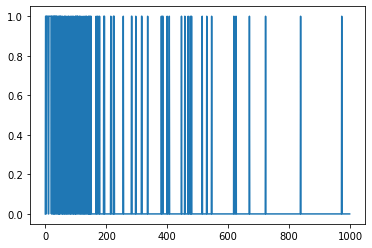

In [ ]:
plt.plot(train_data[0])

In [ ]:
vocab_size = 1000
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 64))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(64, activation = tf.nn.relu))
model.add(keras.layers.Dense(1, activation = tf.nn.sigmoid))
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 68,225
Trainable params: 68,225
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [ ]:
tf.compat.v1.disable_resource_variables()

In [ ]:
model.compile(optimizer=tf.train.AdamOptimizer(), loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
x_val = train_data[:1000]
partial_x_train = train_data[1000:]
y_val = train_labels[:1000]
partial_y_train = train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=10, batch_size=512, validation_data=(x_val, y_val), verbose=1)

Train on 24000 samples, validate on 1000 samples
Epoch 1/10
24000/24000 [==============================] - 5s 195us/sample - loss: 0.6932 - acc: 0.4973 - val_loss: 0.6931 - val_acc: 0.5010
Epoch 2/10
24000/24000 [==============================] - 5s 192us/sample - loss: 0.6932 - acc: 0.5002 - val_loss: 0.6932 - val_acc: 0.4920
Epoch 3/10
24000/24000 [==============================] - 5s 191us/sample - loss: 0.6930 - acc: 0.5058 - val_loss: 0.6929 - val_acc: 0.5210
Epoch 4/10
24000/24000 [==============================] - 5s 194us/sample - loss: 0.6929 - acc: 0.5050 - val_loss: 0.6929 - val_acc: 0.5060
Epoch 5/10
24000/24000 [==============================] - 5s 196us/sample - loss: 0.6929 - acc: 0.5090 - val_loss: 0.6929 - val_acc: 0.5060
Epoch 6/10
24000/24000 [==============================] - 5s 196us/sample - loss: 0.6926 - acc: 0.5140 - val_loss: 0.6927 - val_acc: 0.5230
Epoch 7/10
24000/24000 [==============================] - 5s 197us/sample - loss: 0.6926 - acc: 0.5102 - val_lo

In [ ]:
results = model.evaluate(test_data, test_labels)
print(results)

[0.6917610790252685, 0.52008]


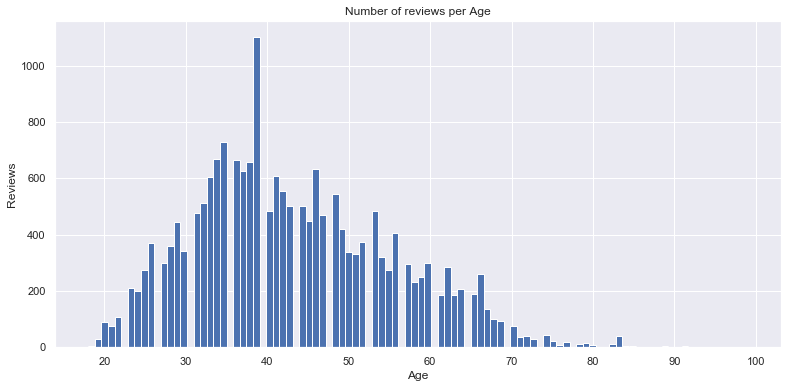

In [ ]:
sns.set(rc={'figure.figsize':(13,6)})
plt.hist(Edata.Age, bins=100)
plt.xlabel('Age')
plt.ylabel('Reviews')
plt.title('Number of reviews per Age');